<h2>Null hypothesis testing</h2>
<p>with 2 conditions in an experiment, we need to determine a measurement of difference between the two groups, say $A$ and $B$</p>
<p>For $A$, we represent the mean with $\bar{x}_a$, for $B$, $\bar{x}_b$</p>
<p>By subtracting, $\bar{x}_a-\bar{x}_b$, we can get a sense of the difference between the groups</p>
<p>Null Hypothesis: $\bar{x}_a-\bar{x}_b=0$</p>
<p>Reject Null Hypothesis $\bar{x}_a-\bar{x}_b \neq 0$</p>

In [2]:
import random, numpy as np, matplotlib.pyplot as plt, pandas as pd, os
%matplotlib inline

In [3]:
data = "fandango_score_comparison.csv"
fandango_df = pd.read_csv(os.path.relpath("Data\\"+data))
fandango_df.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


<h2>Test Statistic</h2>
<p>Now we can determine what's being tested. In this case, let's look at the difference between the mean rating for the Rotten Tomatoes Critics aggregated scores and User aggregated scores for these movies</p>
<p>So $\bar{x}_a$ is the mean of "RottenTomatoes" and $\bar{x}_b$ is the mean of "RottenTomatoes_User"</p>

In [64]:
RT_mean = fandango_df["RottenTomatoes"].mean()
RT_User_mean = fandango_df["RottenTomatoes_User"].mean()
Mean_diff = RT_mean - RT_User_mean
print(Mean_diff)

-3.027397260273979


<h2>The Statistical Test</h2>
<p>With the test statistic (the statistic to-be-tested) established, we need to choose a statistical test</p>
<p>In this case, we can use a <a href="https://en.wikipedia.org/wiki/Resampling_(statistics)#Permutation_tests">permutation test</a> which randomly assigns values from both columns into each other a bunch of times. This simulates randomly selecting from a larger population. The number of permutations of the data, ideally, would be the number of possible permutations, but this is a pretty big number, so folks usually select one stopping point</p>

1000


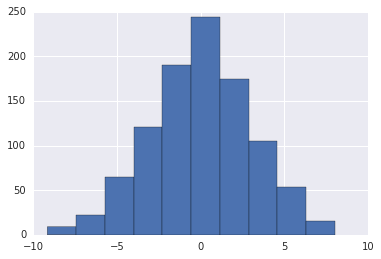

In [65]:

RT_values = fandango_df["RottenTomatoes"]
RT_user_values = fandango_df["RottenTomatoes_User"]
#create big list of all values in both conditions
all_values = RT_values.append(RT_user_values)

mean_differences = []
#create 1000 series of values randomly selected from all_values
for i in range(0,1000):
    group_a = []
    group_b = []
    for i in all_values:
        #use random.rand to produce # between 0 and 1 
        if np.random.rand() >=.5:
            group_a.append(i)
        else:
            group_b.append(i)
    iteration_mean_diff = np.mean(group_b)-np.mean(group_a)
    mean_differences.append(iteration_mean_diff)
print(len(mean_differences))
plt.hist(mean_differences)
plt.show()

<h2>Representing the sampling distribution</h2>
<p>In this case, we want to create a dictionary with each of the mean differences as  keys and their frequency as values</p>
```python
empty_dict = {}
empty_dict.get("value", False) #see if value is in dict, return False if not

```
<p>To do: use .get() method to test if each value in array of mean differences is in the dictionary, if not, add 1 as the value, if it's in there, increment 1</p>



In [66]:
#takes array of sampling mean differences and returns frequency dictionary
def create_sampling_distribution(array): 
    distributions = {}
    for i in array:
        if distributions.get(i, False):
            val = distributions.get(i)
            inc = val +1
            distributions[i]=inc
        else:
            distributions[i]=1
    return distributions
RT_dist = create_sampling_distribution(mean_differences)

<h2>Dat P-value</h2>
<p>Now that we have the dictionary containing the frequency of each mean difference in our permutations, we can test the probability that an observed effect in our permutations is greater than or equal to the observed difference between the two groups.</p>
<p>If we set $p = .05$, and have 1000 permutations, then we'd need to see less than 50 instances in the permutations greater than our observed difference</p>

In [67]:
#takes dictionary of sampling distributions, returns probability of > observed effect
def greater_than_observation(sampling_distribution, test_statistic):
    frequencies = []
    for key in sampling_distribution:
        if key<=test_statistic: #note, used less than cuz the mean difference in observations is negative
            frequencies.append(sampling_distribution[key])
    p_value = np.sum(frequencies)/len(sampling_distribution)
    return p_value
RT_p_value = greater_than_observation(RT_dist, Mean_diff)
print(RT_p_value)

0.167689161554


<p>Given the above p-value, we can see with a cdf that after about 200 permutations, it's pretty much guaranteed that we'd see a similar effect to what was observed in the data. HOWEVER, remember that we're looking at Rotten Tomatoes data, so it's likely that we're not using the right test. Because some movies are rated higher by critics, while the mean difference tells us that the most are rated lower by critics, by using the vanilla mean, we're not seeing the actual differences, but rather the trend of differences. That is, the critics tend to rate movies lower than the plebes, but they also might rate some kinds of movies, e.g. documentaries/films about how great films are (cough, Hugo, cough), much higher, so we should have been looking at (guessing here) pairwise differences, so for each movies, what's the difference between the critic and pleb ratings, or something like that</p>

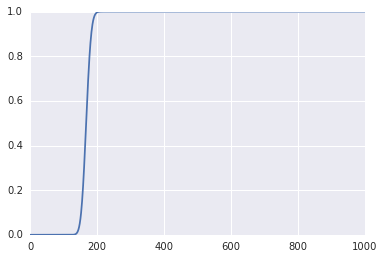

In [68]:
from scipy import linspace
from scipy.stats import binom
outcomes = linspace(0,1000,1001)
dist = binom.cdf(outcomes, 1000, RT_p_value)
plt.plot(outcomes, dist)

In [69]:
max_critic = max(fandango_df["RottenTomatoes"])
max_user = max(fandango_df["RottenTomatoes_User"])

In [70]:
critic_ratio = fandango_df["RottenTomatoes"]/max_critic
user_ratio = fandango_df["RottenTomatoes_User"]/max_user
mean_critic_ratio = np.mean(critic_ratio)
mean_user_ratio = np.mean(user_ratio)
mean_ratio_diff = mean_critic_ratio-mean_user_ratio
print(mean_ratio_diff)

-0.07104634217429329


0.015015015015


(array([   3.,    4.,   35.,   89.,  206.,  254.,  220.,  135.,   39.,   15.]),
 array([-0.11987457, -0.09861277, -0.07735096, -0.05608916, -0.03482735,
        -0.01356555,  0.00769625,  0.02895806,  0.05021986,  0.07148166,
         0.09274347]),
 <a list of 10 Patch objects>)

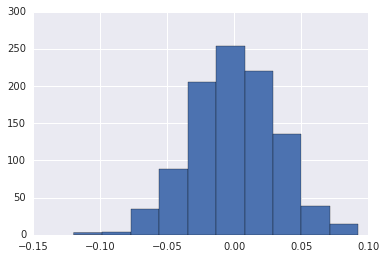

In [74]:

#create big list of all values in both conditions
all_values = critic_ratio.append(user_ratio)
def sampling_permutations(array, k_permutations):
    mean_differences = []
    #create k series of values randomly selected from all_values
    for i in range(0,k_permutations):
        group_a = []
        group_b = []
        for i in array:
            #use random.rand to produce # between 0 and 1 
            if np.random.rand() >=.5:
                group_a.append(i)
            else:
                group_b.append(i)
        iteration_mean_diff = np.mean(group_b)-np.mean(group_a)
        mean_differences.append(iteration_mean_diff)
    return mean_differences
ratio_mean_diffs = sampling_permutations(all_values, 1000)

ratio_sampling_dist = create_sampling_distribution(ratio_mean_diffs)

ratio_p_value = greater_than_observation(ratio_sampling_dist, mean_ratio_diff)
print(ratio_p_value)
plt.hist(ratio_mean_diffs)

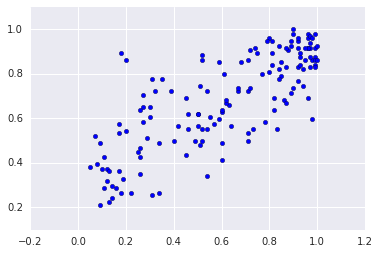

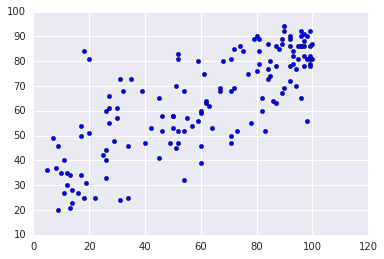

In [72]:
import seaborn as sns
plt.scatter(critic_ratio, user_ratio)
plt.show()
plt.scatter(RT_values, RT_user_values)
plt.show()

<h1>Summary of what got done here</h1>
<p>With two groups, $x_a$ and $x_b$, each with a mean, $\bar{x}_a$ and $\bar{x}_b$, respectively:</p>
<p>If we take the difference $\bar{x}_b-\bar{x}_a$, we then need to figure out the probability we'd see an effect like that by just randomly sampling stuff</p>
<p>So, we can think of <em>permutations</em> of our sample population, which is just a big bucket of all of the observations from the two conditions. If we took that same group of observations and randomly pulled $n$ values out for each group, what is the probability that the mean difference of each of those permutations is greater than the mean difference of our trials</p>
<p>So, we get a mean difference for our testing conditions, and if we do, say, 1000 permutations, the p-value is the ratio of permutations that resulted in a greater mean difference than our testing conditions to 1000</p>
